## Spike sorting in Datajoint framework

In this notebook, we will run spike sorting on a recording stored in our Datajoint schema. You must first have imported 'beans20190718-trim_.nwb' file to Datajoint.

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import pynwb
import os

import datajoint as dj
import nwb_datajoint as nd
from ndx_franklab_novela import Probe

import spiketoolkit as st

import warnings
warnings.simplefilter('ignore')

data_dir = Path('/stelmo/nwb') # CHANGE ME TO THE BASE DIRECTORY FOR DATA STORAGE ON YOUR SYSTEM

os.environ['NWB_DATAJOINT_BASE_DIR'] = str(data_dir)
os.environ['KACHERY_STORAGE_DIR'] = str(data_dir / 'kachery-storage')
os.environ['SPIKE_SORTING_STORAGE_DIR'] = str(data_dir / 'spikesorting')

Connecting kyu@lmf-db.cin.ucsf.edu:3306


### Set the NWB file name

In [2]:
nd.common.Session()

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718-trim_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
beans20190718_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
despereaux20191125_.nwb,Despereaux,"University of California, San Francisco",Loren Frank,4,Sungod,2019-11-25 10:17:29,1970-01-01 00:00:00,Sungod control
Jaq20190826_.nwb,Jaq,"University of California, San Francisco",Loren Frank,jaq_01,Theta and gait,2019-08-26 16:53:47,1970-01-01 00:00:00,Theta and gait


We will first get the name of our nwb file. To do so, we will find the row corresponding to our session ID (beans_01) in the Sessions table and get the nwb filename from that row.

- __in this case there are two nwb files that have the same session name__

In [3]:
# nwb_file_name = (nd.common.Session() & {'session_id': 'beans_01'}).fetch1('nwb_file_name')
nwb_file_name = 'Jaq20190826_.nwb'

In [4]:
nd.common.SortGroup()

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
Jaq20190826_.nwb,0,-1
Jaq20190826_.nwb,1,-1
Jaq20190826_.nwb,2,-1
Jaq20190826_.nwb,3,-1
Jaq20190826_.nwb,4,-1
Jaq20190826_.nwb,5,-1
Jaq20190826_.nwb,6,-1
Jaq20190826_.nwb,7,-1
Jaq20190826_.nwb,8,-1
Jaq20190826_.nwb,9,-1


### Set the sort group

Sort group refers to the set of electrodes that will be sorted together (because, for example, they are physically close and would detect signal from the same neuron). In this example, each sort group corresponds to a shank of the implanted neural probe. 

__Later we will also set electrode group, which is a superset of sort group and in this case refers to the probe.__

In [5]:
nd.common.SortGroup().set_group_by_shank(nwb_file_name)
nd.common.SortGroup()

About to delete:
`common_spikesorting`.`sort_group__sort_group_electrode`: 120 items
`common_spikesorting`.`spike_sorting_parameters`: 1 items
`common_spikesorting`.`sort_group`: 30 items
Proceed? [yes, No]: yes
Committed.


nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
Jaq20190826_.nwb,0,-1
Jaq20190826_.nwb,1,-1
Jaq20190826_.nwb,2,-1
Jaq20190826_.nwb,3,-1
Jaq20190826_.nwb,4,-1
Jaq20190826_.nwb,5,-1
Jaq20190826_.nwb,6,-1
Jaq20190826_.nwb,7,-1
Jaq20190826_.nwb,8,-1
Jaq20190826_.nwb,9,-1


Optional: Display all of the electrodes with their sort groups

In [6]:
nd.common.SortGroup.SortGroupElectrode()

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,electrode_group_name electrode group name from NWBFile,electrode_id the unique number for this electrode
Jaq20190826_.nwb,0,0,0
Jaq20190826_.nwb,0,0,1
Jaq20190826_.nwb,0,0,2
Jaq20190826_.nwb,0,0,3
Jaq20190826_.nwb,1,1,4
Jaq20190826_.nwb,1,1,5
Jaq20190826_.nwb,1,1,6
Jaq20190826_.nwb,1,1,7
Jaq20190826_.nwb,2,10,40
Jaq20190826_.nwb,2,10,41


### Create the spike sorter and parameter lists 

The next step is to load a spike sorter from spikeinterface, which is a python wrapper of ten spike sorters that are popular. We have to also set the parameter for the sorter we want.

In [7]:
nd.common.SpikeSorter().insert_from_spikeinterface()
nd.common.SpikeSorterParameters().insert_from_spikeinterface()

In [8]:
nd.common.SpikeSorter()

sorter_name the name of the spike sorting algorithm
hdsort
herdingspikes
ironclust
kilosort
kilosort2
klusta
mountainsort4
spykingcircus
tridesclous
waveclus


In [9]:
nd.common.SpikeSorterParameters()

sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,parameter_dict dictionary of parameter names and values
hdsort,default,=BLOB=
herdingspikes,default,=BLOB=
ironclust,default,=BLOB=
kilosort,default,=BLOB=
kilosort2,default,=BLOB=
klusta,default,=BLOB=
mountainsort4,default,=BLOB=
mountainsort4,franklab_mountainsort_20KHz,=BLOB=
mountainsort4,franklab_mountainsort_30KHz,=BLOB=
spykingcircus,default,=BLOB=


### create a 'franklab_mountainsort' parameter set

Here we will set the parameters for Mountainsort that would work for data generated in frank lab.
If using virga, set num workers to be 32.

In [9]:
p = (nd.common.SpikeSorterParameters() & {'sorter_name': 'mountainsort4', 'parameter_set_name' : 'default'}).fetch1()
p

{'sorter_name': 'mountainsort4',
 'parameter_set_name': 'default',
 'parameter_dict': {'detect_sign': -1,
  'adjacency_radius': -1,
  'freq_min': 300,
  'freq_max': 6000,
  'filter': True,
  'whiten': True,
  'curation': False,
  'num_workers': None,
  'clip_size': 50,
  'detect_threshold': 3,
  'detect_interval': 10,
  'noise_overlap_threshold': 0.15}}

In [10]:
param = p['parameter_dict']
param['adjacency_radius'] = 100
param['curation'] = False
param['num_workers'] = 4
param['verbose'] = True
param['clip_size'] = 50
param['noise_overlap_threshold'] = 0

nd.common.SpikeSorterParameters().insert1({'sorter_name': 'mountainsort4', 'parameter_set_name' : 'franklab_mountainsort_30KHz', 'parameter_dict' : param}, skip_duplicates='True')

Display the new parameter set

In [11]:
p = (nd.common.SpikeSorterParameters() & {'sorter_name': 'mountainsort4', 'parameter_set_name' : 'franklab_mountainsort_30KHz'}).fetch1()
p

{'sorter_name': 'mountainsort4',
 'parameter_set_name': 'franklab_mountainsort_30KHz',
 'parameter_dict': {'detect_sign': -1,
  'adjacency_radius': 100,
  'freq_min': 300,
  'freq_max': 6000,
  'filter': True,
  'whiten': True,
  'curation': False,
  'num_workers': 4,
  'clip_size': 50,
  'detect_threshold': 3,
  'detect_interval': 10,
  'noise_overlap_threshold': 0,
  'verbose': True}}

In [12]:
param = p['parameter_dict']
param

{'detect_sign': -1,
 'adjacency_radius': 100,
 'freq_min': 300,
 'freq_max': 6000,
 'filter': True,
 'whiten': True,
 'curation': False,
 'num_workers': 4,
 'clip_size': 50,
 'detect_threshold': 3,
 'detect_interval': 10,
 'noise_overlap_threshold': 0,
 'verbose': True}

### Create a set of spike sorting parameters for sorting group 1

In [13]:
# create a 10 second test intervals for debugging
s1 = (nd.common.IntervalList() & {'nwb_file_name' : nwb_file_name,'interval_list_name':'02_lineartrack'}).fetch1('valid_times')
print(s1)

[[1.56686539e+09 1.56686629e+09]]


In [16]:
a = np.asarray([s1[0][0], s1[0][0]+10])
nd.common.SortInterval().insert1({'nwb_file_name' : nwb_file_name, 'sort_interval_name' : 'test', 'sort_interval' : a},skip_duplicates=True)

print(a)

[1.56686539e+09 1.56686540e+09]


In [17]:
# create the sorting waveform parameters table
n_noise_waveforms = 1000 # the number of random noise waveforms to save
waveform_param_dict = st.postprocessing.get_waveforms_params()
waveform_param_dict['grouping_property'] = 'group'
# set the window to half of the clip size before and half after
waveform_param_dict['ms_before'] = .75
waveform_param_dict['ms_after'] = .75
waveform_param_dict['dtype'] = 'i2'
waveform_param_dict['verbose'] = False
waveform_param_dict['max_spikes_per_unit'] = 1000
nd.common.SpikeSortingWaveformParameters.insert1({'waveform_parameters_name' : 'franklab default', 'n_noise_waveforms' : n_noise_waveforms, 
                                                   'waveform_parameter_dict' : waveform_param_dict}, replace='True')

In [21]:
sort_group_id = 1
key = dict()
key['nwb_file_name'] = nwb_file_name
key['sort_group_id'] = sort_group_id
key['sorter_name'] = 'mountainsort4'
key['parameter_set_name'] = 'franklab_mountainsort_30KHz'
key['waveform_parameters_name'] = 'franklab default'
key['interval_list_name'] = '02_lineartrack'
key['sort_interval_name'] = 'test'
nd.common.SpikeSortingParameters().insert1(key, skip_duplicates='True')

In [110]:
raw_data_obj = (nd.common.Raw() & {'nwb_file_name' : nwb_file_name}).fetch_nwb()[0]['raw']
timestamps = np.asarray(raw_data_obj.timestamps)

s1 = (nd.common.IntervalList() & {'nwb_file_name' : nwb_file_name,'interval_list_name':'02_lineartrack'}).fetch1('valid_times')
a = np.asarray([s1[0][0], s1[0][0]+10])
print(a)
print(a[1]-a[0])

[1.56686539e+09 1.56686540e+09]
10.0


In [107]:
np.searchsorted(timestamps, np.ravel(a))

array([39461936, 39461936])

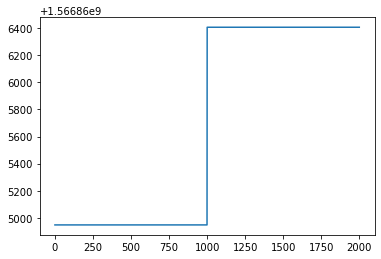

In [109]:
import matplotlib.pyplot as plt
plt.plot(timestamps[39461936-1000:39461936+1000])

In [102]:
np.searchsorted(timestamps, a+5000)

array([108889781, 221449247])

In [67]:
np.searchsorted(timestamps, a[1])

39461936

In [90]:
a

array([1.56686539e+09, 1.56686540e+09])

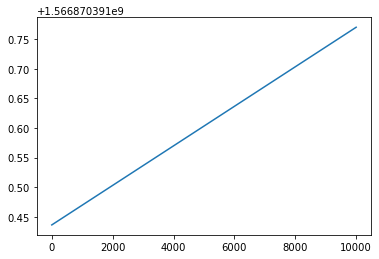

In [104]:
import matplotlib.pyplot as plt
plt.plot(timestamps[108889781:108889781+10000])

In [56]:
timestamps[39461937]

1566866407.2848182

In [61]:
timestamps[39461936]-a[1]

1015.8482513427734

In [44]:
sort_indeces

array([39461936, 39461936])

In [40]:
a[1]

1566865401.436534

In [38]:
timestamps[-1]

1566871820.4977267

### run the sort - this can take some time

In [23]:
nd.common.SpikeSorting().populate()

in spike sorting
writing new NWB file Jaq20190826_000000.nwb
'end_frame' set to 0


AssertionError: 'start_frame' must be less than 'end_frame'!


### Example: Retrieve the spike trains:
Note that these spikes are all noise; this is for demonstration purposes only.

In [ ]:
nd.common.SpikeSorting()

In [ ]:
sort_interval = (nd.common.SortIntervalList() & {'sort_interval_list_name' : 'test'}).fetch1('sort_intervals')[0]

key = nd.common.SpikeSorting().fetch('KEY')[0]

recording = nd.common.SpikeSorting().get_recording_extractor(key, sort_interval)[0]
sorting = nd.common.SpikeSorting().get_sorting_extractor(key, sort_interval)


In [ ]:
# get the timestamps and select 1000 random times
raw_obj = (nd.common.Raw() & {'nwb_file_name' : nwb_file_name}).fetch_nwb()[0]['raw']
ts = np.asarray(raw_obj.timestamps)
ts_sort_ind = np.where(np.logical_and((ts > sort_interval[0]), (ts < sort_interval[1])))[0]


In [ ]:
n_random_snippets = 1000
# generate a list of random times and get snippets for those times
rng = np.random.default_rng()
noise_indeces = np.sort(rng.choice(ts_sort_ind, n_random_snippets))
noise_sorting=se.NumpySortingExtractor()
noise_sorting.set_times_labels(times=noise_indeces,labels=np.zeros(noise_indeces.shape))

In [ ]:
nd.common.Nwbfile().drop()

In [ ]:
import spikeextractors as se
import labbox_ephys as le
import numpy as np
import h5py

#add a second snippets file with 1000 random spike times across all channels

# Specify the output path
output_h5_path = 'real_snippets.h5'

# Prepare the snippets h5 file
le.prepare_snippets_h5_from_extractors(
    recording=recording,
    sorting=sorting,
    output_h5_path=output_h5_path,
    start_frame=None,
    end_frame=None,
    snippet_len = (10,20),
    max_events_per_unit=None,
    max_neighborhood_size=6
)

output_h5_path = 'noise_snippets.h5'
le.prepare_snippets_h5_from_extractors(
    recording=recording,
    sorting=noise_sorting,
    output_h5_path=output_h5_path,
    start_frame=None,
    end_frame=None,
    snippet_len = (10,20),
    max_events_per_unit=None,
    max_neighborhood_size=10000
)



# Example display some contents of the file
with h5py.File(output_h5_path, 'r') as f:
    unit_ids = np.array(f.get('unit_ids'))
    sampling_frequency = np.array(f.get('sampling_frequency'))[0]
    print(f'Unit IDs: {unit_ids}')
    print(f'Sampling freq: {sampling_frequency}')
    for unit_id in unit_ids:
        unit_spike_train = np.array(f.get(f'unit_spike_trains/{unit_id}'))
        unit_waveforms = np.array(f.get(f'unit_waveforms/{unit_id}/waveforms'))
        unit_waveforms_channel_ids = np.array(f.get(f'unit_waveforms/{unit_id}/channel_ids'))
        print(f'Unit {unit_id} | Tot num events: {len(unit_spike_train)} | shape of subsampled snippets: {unit_waveforms.shape}')

In [ ]:
cd .

In [ ]:
nd.common.SpikeSorting().delete()

In [ ]:
sorting = (nd.common.SpikeSorting & {'nwb_file_name' : nwb_file_name, 'sort_group_id' : sort_group_id}).fetch()
key = {'nwb_file_name' : nwb_file_name, 'sort_group_id' : sort_group_id}
units = (nd.common.SpikeSorting & key).fetch_nwb()[0]['units'].to_dataframe()
units

In [ ]:
dj.conn

In [ ]:
nd.common.Nwbfile().delete()